In [1]:
from datetime import date
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Data Selection and modify start and end date
train_howmanyyears_begin = 5
train_howmanymonths_end = 3
today = date.today()
TRAIN_START_DATE = date(today.year - train_howmanyyears_begin,today.month, today.day).isoformat()

# The problem is in calculation of month for TRAIN_END_DATE.
# If today.month - train_howmanymonths_end results in 0 or negative value, it's an invalid month.
# Instead, we can adjust the year if we need to go back more than the current month
# For example, if today is March and we want to go back 3 months, we should get December of the previous year.

# Calculate the target month
target_month = today.month - train_howmanymonths_end

# Adjust year and month if necessary
target_year = today.year
if target_month <= 0:
    target_year -= 1
    target_month += 12  # Add 12 to get the correct month in the previous year

TRAIN_END_DATE = date(target_year, target_month, today.day).isoformat()

test_howmanymonths_begin = 3
TEST_START_DATE = TRAIN_END_DATE
TEST_END_DATE = today.isoformat()



In [3]:
print(TRAIN_START_DATE)
print(TRAIN_END_DATE)
print(TEST_START_DATE)
print(TEST_END_DATE)


2020-04-01
2025-01-01
2025-01-01
2025-04-01


In [4]:
# Load the training data
whichstock = 'RELIANCE.NS' # Reliance Industries
data_train = yf.download(whichstock,start = TRAIN_START_DATE , end = TRAIN_END_DATE)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
print(data_train.columns)

MultiIndex([( 'Close', 'RELIANCE.NS'),
            (  'High', 'RELIANCE.NS'),
            (   'Low', 'RELIANCE.NS'),
            (  'Open', 'RELIANCE.NS'),
            ('Volume', 'RELIANCE.NS')],
           names=['Price', 'Ticker'])


In [6]:
data_train.head()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2020-04-01,485.273071,505.102566,469.440896,504.047088,41597459
2020-04-03,483.925659,509.526647,474.426354,509.526647,41367807
2020-04-07,541.707520,545.255683,494.053768,494.996965,54373624
2020-04-08,535.442017,551.992856,521.002194,529.984974,49880330
2020-04-09,547.928101,553.699532,535.823798,545.255705,33032857


In [7]:
data_train.reset_index(inplace=True)

In [8]:
data_train['Date'] = pd.to_datetime(data_train['Date'])

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   (Date, )               1175 non-null   datetime64[ns]
 1   (Close, RELIANCE.NS)   1175 non-null   float64       
 2   (High, RELIANCE.NS)    1175 non-null   float64       
 3   (Low, RELIANCE.NS)     1175 non-null   float64       
 4   (Open, RELIANCE.NS)    1175 non-null   float64       
 5   (Volume, RELIANCE.NS)  1175 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 55.2 KB


In [10]:
data_train.shape

(1175, 6)

In [11]:
# Load test data
data_test =  yf.download(whichstock,start = TEST_START_DATE , end = TEST_END_DATE)
data_test.reset_index(inplace=True)
data_test['Date'] = pd.to_datetime(data_test['Date'])

[*********************100%***********************]  1 of 1 completed


In [12]:
data_test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
0,2025-01-01,1221.250000,1226.300049,1211.599976,1214.849976,5892590
1,2025-01-02,1241.800049,1244.449951,1220.000000,1221.250000,15486276
2,2025-01-03,1251.150024,1262.050049,1235.500000,1243.900024,15521102
3,2025-01-06,1218.000000,1262.000000,1215.000000,1253.949951,14816766
4,2025-01-07,1240.849976,1244.500000,1221.250000,1222.000000,10070505


In [13]:
data_test.shape

(62, 6)

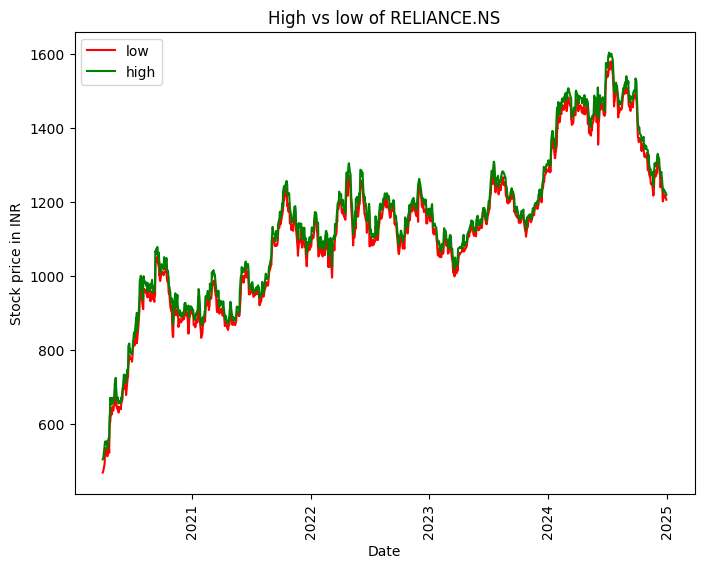

In [14]:
plt.figure(figsize = (8,6))
plt.plot(data_train['Date'],data_train['Low'],label = 'low',color = 'red')
plt.plot(data_train['Date'],data_train['High'],label = 'high',color = 'green')
plt.ylabel("Stock price in INR")
plt.xlabel("Date")
plt.title(f"High vs low of {whichstock}")
plt.xticks(rotation=90)
plt.legend();


In [15]:
data_train['EMA-50'] = data_train['Open','RELIANCE.NS'].ewm(span = 50, adjust=False).mean()
data_train['EMA-200'] = data_train['Open','RELIANCE.NS'].ewm(span = 200, adjust=False).mean()

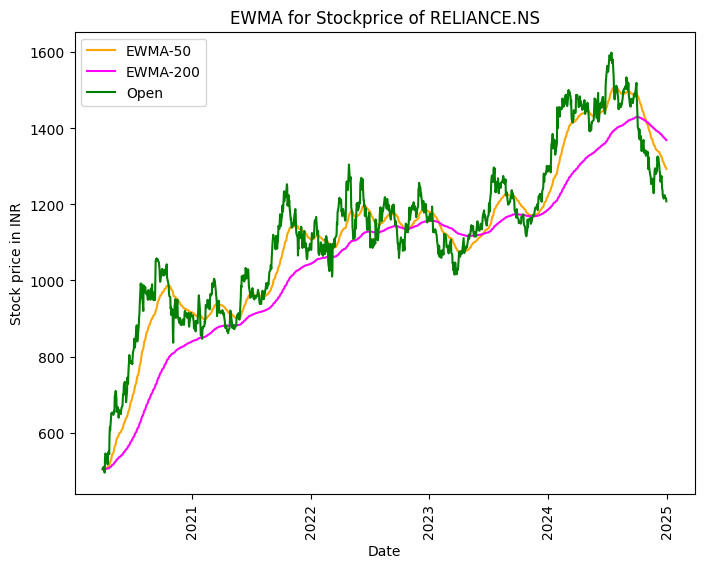

In [16]:
plt.figure(figsize = (8,6))
plt.plot(data_train['Date'],data_train['EMA-50'],label = 'EWMA-50',color = 'orange')
plt.plot(data_train['Date'],data_train['EMA-200'],label = 'EWMA-200',color = 'magenta')
plt.plot(data_train['Date'],data_train['Open'],label = 'Open',color = 'green')
plt.ylabel("Stock price in INR")
plt.xlabel("Date")
plt.title(f"EWMA for Stockprice of {whichstock}")
plt.xticks(rotation=90)
plt.legend();


In [17]:
# Change column names  for easy readability
df_train = pd.DataFrame(data_train)

In [18]:
df_train.columns

MultiIndex([(   'Date',            ''),
            (  'Close', 'RELIANCE.NS'),
            (   'High', 'RELIANCE.NS'),
            (    'Low', 'RELIANCE.NS'),
            (   'Open', 'RELIANCE.NS'),
            ( 'Volume', 'RELIANCE.NS'),
            ( 'EMA-50',            ''),
            ('EMA-200',            '')],
           names=['Price', 'Ticker'])

In [19]:
df_train = df_train.set_axis(['Date','Close','High','Low','Open','Volume','EMA-50','EMA-200'],axis = 1 )

In [20]:
df_train.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'EMA-50', 'EMA-200'], dtype='object')

In [21]:
# Change column names  for easy readability
df_test = pd.DataFrame(data_test)
df_test = df_test.set_axis(['Date','Close','High','Low','Open','Volume'],axis = 1 )

In [22]:
# SElect Open from the columns for training
training_set = df_train.iloc[:,4:5]
training_set[0:5]

,Open
0,504.047088
1,509.526647
2,494.996965
3,529.984974
4,545.255705


In [23]:
training_set.shape

(1175, 1)

In [24]:
# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [25]:
# create input data with 60 timesteps and one output
n_timesteps = 60
X_train =[]
Y_train =[]

for i in range(n_timesteps, len(training_set_scaled)):
      X_train.append(training_set_scaled[i-n_timesteps: i , 0])
      Y_train.append(training_set_scaled[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [26]:
training_set_scaled.shape

(1175, 1)

In [27]:
X_train.shape

(1115, 60)

In [28]:
X_train[0,:].shape

(60,)

In [29]:
Y_train.shape

(1115,)

In [30]:
# Reshape X_train
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1115, 60, 1)

In [31]:
#Building of RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [32]:
n_units = 50
n_drop = 0.2
# initialize RNN
regressor = Sequential()
regressor.add(LSTM(units = n_units, return_sequences= True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(n_drop))
regressor.add(LSTM(units = n_units, return_sequences= True))
regressor.add(Dropout(n_drop))
regressor.add(LSTM(units = n_units, return_sequences= True))
regressor.add(Dropout(n_drop))
regressor.add(LSTM(units = n_units, return_sequences= False))
regressor.add(Dropout(n_drop))
regressor.add(Dense(units = 1)) # output layer

# Compile
regressor.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
# Fitting the training data
regressor.fit(X_train, Y_train , epochs = 100 , batch_size = 60)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.2090
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0136
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0097
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0070
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0062
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0066
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0053
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0063
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0057
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0055
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0048
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0050
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0049
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0047
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - lo

In [34]:
# Making predictions and visulize results
real_stock_price = df_test.iloc[:,4:5]
df_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0 )
input = df_total[len(df_total)-len(df_test)-n_timesteps:].values

In [35]:
input = input.reshape(-1,1)
input = sc.transform(input)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [36]:
X_test = []
for i in range(n_timesteps , n_timesteps + len(df_test)):
   X_test.append(input[i-n_timesteps: i, 0])

In [37]:
len(X_test)

62

In [38]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [39]:
X_test.shape

(62, 60, 1)

In [40]:
predicted_stock_price = regressor.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 360ms/step


In [41]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

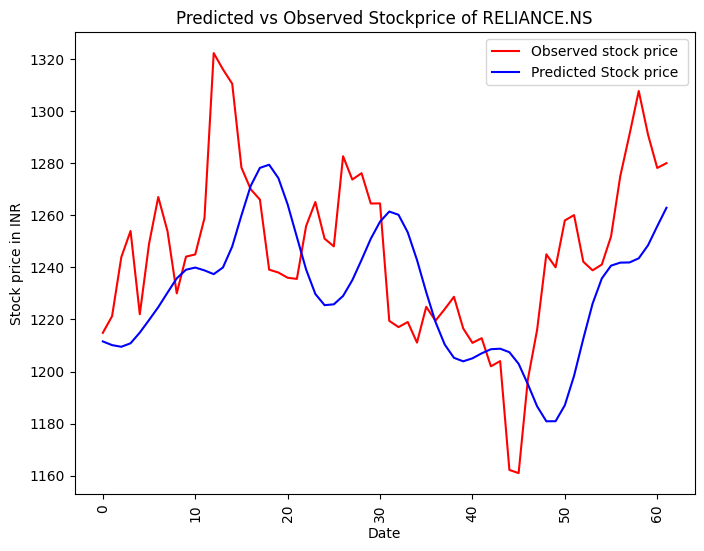

In [42]:
plt.figure(figsize = (8,6))
plt.plot(real_stock_price,color = 'red', label = "Observed stock price")
plt.plot(predicted_stock_price,label = "Predicted Stock price ",color = 'blue')
plt.ylabel("Stock price in INR")
plt.xlabel("Date")
plt.title(f"Predicted vs Observed Stockprice of {whichstock}")
plt.xticks(rotation=90)
plt.legend();


In [43]:
# Define function to prepare data based on n_timesteps
def prepare_data(data, n_timesteps):

    # Prepare X_train and y_train
    X_train, y_train = [], []
    for i in range(n_timesteps, len(training_set_scaled)):
        X_train.append(training_set_scaled[i-n_timesteps:i, 0])
        y_train.append(training_set_scaled[i, 0])

    # Convert to numpy arrays
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshape X_train
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    testing_set = df_test.iloc[:,4:5]
    testing_set_scaled = sc.fit_transform(testing_set)

    X_test = []
    y_test = []
    for i in range(n_timesteps ,  len(testing_set_scaled)):
        #Check if enough data points are available for creating time series data
        if i-n_timesteps >=0:
            X_test.append(testing_set_scaled[i-n_timesteps: i, 0])
            y_test.append(testing_set_scaled[i, 0])
        else:
            break
    #Check if X_test has data before reshaping
    if X_test:
        X_test = np.array(X_test)
        X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    else:
        # Handle empty X_test if no enough data available
        # For example, return empty arrays or raise an error
        X_test = np.empty(shape=(0, n_timesteps, 1))
        y_test = np.empty(shape=(0,))


    return X_train, y_train, X_test, y_test, sc

In [44]:
# Function to build and train LSTM model
def build_train_evaluate_model(params, X_train, y_train, X_test, y_test, verbose=0):
    n_units, n_drop, batch_size = params

    start_time = time.time()

    # Initialize model
    model = Sequential()

    # Add layers
    model.add(LSTM(units=n_units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(n_drop))
    model.add(LSTM(units=n_units, return_sequences=True))
    model.add(Dropout(n_drop))
    model.add(LSTM(units=n_units, return_sequences=True))
    model.add(Dropout(n_drop))
    model.add(LSTM(units=n_units, return_sequences=False))
    model.add(Dropout(n_drop))
    model.add(Dense(units=1))

    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=verbose
    )

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    training_time = time.time() - start_time

    return {
        'n_units': n_units,
        'n_drop': n_drop,
        'batch_size': batch_size,
        'mse': mse,
        'mae': mae,
        'val_loss': min(history.history['val_loss']),
        'training_time': training_time
    }

In [45]:
from keras.callbacks import EarlyStopping
import itertools
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error

sc = MinMaxScaler(feature_range=(0,1))

# Main grid search function
def grid_search(training_set):
    # Define hyperparameter grid
    param_grid = {
        'n_units': [32, 50, 64],
        'n_drop': [0.1, 0.2, 0.3],
        'n_timesteps': [30,60, 90],
        'batch_size': [16, 32, 64]
    }
    # Track results
    results = []

    # For each timestep value
    for n_timesteps in param_grid['n_timesteps']:
        print(f"Processing with n_timesteps={n_timesteps}")

        # Prepare data specific to this timestep
        X_train, y_train, X_test, y_test, scaler = prepare_data(training_set, n_timesteps)

        # Create parameter combinations for this timestep
        param_combinations = list(itertools.product(
            param_grid['n_units'],
            param_grid['n_drop'],
            param_grid['batch_size']
        ))

        # Run in parallel
        batch_results = Parallel(n_jobs=-1)(
            delayed(build_train_evaluate_model)(
                params, X_train, y_train, X_test, y_test
            ) for params in param_combinations
        )

        # Add n_timesteps to results
        for result in batch_results:
            result['n_timesteps'] = n_timesteps
            results.append(result)

    # Convert to DataFrame
    results_df = pd.DataFrame(results)

    # Find best model based on MSE
    best_model = results_df.loc[results_df['mse'].idxmin()]

    print("\nGrid Search Results:")
    print(results_df.sort_values('mse'))

    print("\nBest Model Configuration:")
    print(f"n_units: {best_model['n_units']}")
    print(f"n_drop: {best_model['n_drop']}")
    print(f"n_timesteps: {best_model['n_timesteps']}")
    print(f"batch_size: {best_model['batch_size']}")
    print(f"MSE: {best_model['mse']}")
    print(f"MAE: {best_model['mae']}")



    return results_df, best_model

In [ ]:
grid_search(training_set_scaled)

**Best Hyperparameters Found:**
 - **timestep:** 30
 - **dropout:** 0.3
 - **batch_size:** 32
 - **Test MSE:** 23376.074076444398